<a href="https://colab.research.google.com/github/oskrtrom/oskrtrom.github.io/blob/main/DatosImportantes1900a2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Ruta al archivo CSV
ruta_archivo = 'Significant Earthquake Dataset 1900-2023.csv'

# Cargar el archivo CSV en un DataFrame de pandas
datos_sismicos = pd.read_csv(ruta_archivo)

# Verificar las primeras filas del DataFrame
print(datos_sismicos.head())

# Parseo de fechas y establecimiento como índice
datos_sismicos['Time'] = pd.to_datetime(datos_sismicos['Time'])
datos_sismicos.set_index('Time', inplace=True)

# Verificar las primeras filas del DataFrame después del procesamiento
print(datos_sismicos.head())


                       Time                            Place  Latitude  \
0  2023-02-17T09:37:34.868Z     130 km SW of Tual, Indonesia   -6.5986   
1  2023-02-16T05:37:05.138Z    7 km SW of Port-Olry, Vanuatu  -15.0912   
2  2023-02-15T18:10:10.060Z      Masbate region, Philippines   12.3238   
3  2023-02-15T06:38:09.034Z  54 km WNW of Otaki, New Zealand  -40.5465   
4  2023-02-14T13:16:51.072Z      2 km NW of Lele?ti, Romania   45.1126   

   Longitude   Depth  Mag MagType    nst   gap   dmin  ...  \
0   132.0763  38.615  6.1     mww  119.0  51.0  2.988  ...   
1   167.0294  36.029  5.6     mww   81.0  26.0  0.392  ...   
2   123.8662  20.088  6.1     mww  148.0  47.0  5.487  ...   
3   174.5709  74.320  5.7     mww   81.0  40.0  0.768  ...   
4    23.1781  10.000  5.6     mww  132.0  28.0  1.197  ...   

                    Updated Unnamed: 14        Type horizontalError  \
0  2023-02-17T17:58:24.040Z         NaN  earthquake            6.41   
1  2023-02-17T05:41:32.448Z         NaN 

In [2]:
import pandas as pd

# Ruta al archivo CSV
ruta_archivo = 'Significant Earthquake Dataset 1900-2023.csv'

# Cargar el archivo CSV en un DataFrame de pandas
datos_sismicos = pd.read_csv(ruta_archivo)

# Parseo de fechas y establecimiento como índice
datos_sismicos['Time'] = pd.to_datetime(datos_sismicos['Time'])
datos_sismicos.set_index('Time', inplace=True)


In [3]:
# Exploración de datos
print(datos_sismicos.info())
print(datos_sismicos.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37331 entries, 2023-02-17 09:37:34.868000+00:00 to 1900-10-09 12:25:00+00:00
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Place            37047 non-null  object 
 1   Latitude         37331 non-null  float64
 2   Longitude        37331 non-null  float64
 3   Depth            37197 non-null  float64
 4   Mag              37331 non-null  float64
 5   MagType          37331 non-null  object 
 6   nst              7473 non-null   float64
 7   gap              10087 non-null  float64
 8   dmin             4395 non-null   float64
 9   rms              20218 non-null  float64
 10  net              37331 non-null  object 
 11  ID               37331 non-null  object 
 12  Updated          37331 non-null  object 
 13  Unnamed: 14      0 non-null      float64
 14  Type             37331 non-null  object 
 15  horizontalError  3970 non-null   float64
 16  dept

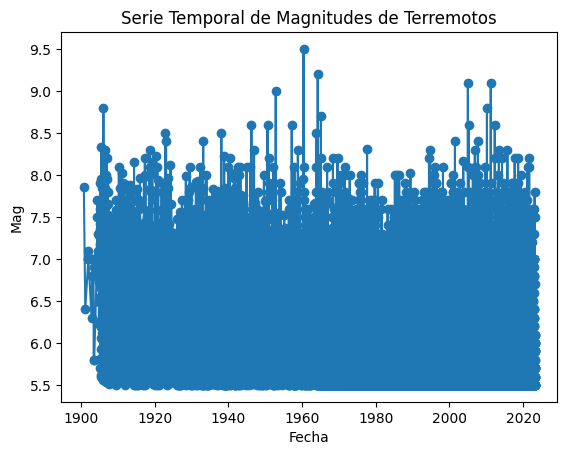

In [4]:
import matplotlib.pyplot as plt

# Gráfico de series temporales
plt.plot(datos_sismicos.index, datos_sismicos['Mag'], marker='o')
plt.title('Serie Temporal de Magnitudes de Terremotos')
plt.xlabel('Fecha')
plt.ylabel('Mag')
plt.show()


In [7]:
# Manejo de datos atípicos
datos_sismicos_sin_atipicos = datos_sismicos[(datos_sismicos['Mag'] > 3.0) & (datos_sismicos['Mag'] < 9.0)]


In [8]:
# Selección de características relevantes
caracteristicas_seleccionadas = ['Mag', 'Depth', 'Latitude', 'Longitude']
datos_sismicos_seleccionados = datos_sismicos_sin_atipicos[caracteristicas_seleccionadas]


In [9]:
# Identificación de datos faltantes
datos_faltantes = datos_sismicos_seleccionados.isnull().sum()

In [10]:
# Imputación de datos usando la mediana
datos_sismicos_imputados = datos_sismicos_seleccionados.fillna(datos_sismicos_seleccionados.median())


In [11]:
# Evaluación del impacto
estadisticas_despues_imputacion = datos_sismicos_imputados.describe()


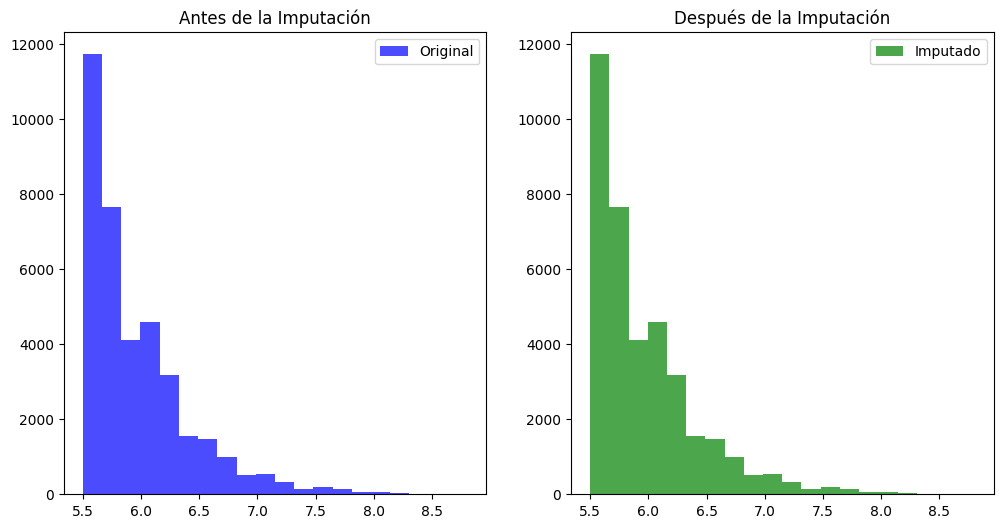

In [12]:
# Visualización comparativa antes y después de la imputación
plt.figure(figsize=(12, 6))

# Gráfico antes de la imputación
plt.subplot(1, 2, 1)
plt.title('Antes de la Imputación')
plt.hist(datos_sismicos_seleccionados['Mag'].dropna(), bins=20, color='blue', alpha=0.7, label='Original')
plt.legend()

# Gráfico después de la imputación
plt.subplot(1, 2, 2)
plt.title('Después de la Imputación')
plt.hist(datos_sismicos_imputados['Mag'], bins=20, color='green', alpha=0.7, label='Imputado')
plt.legend()

plt.show()

Error cuadrático medio (MSE): 0.20401233545788822


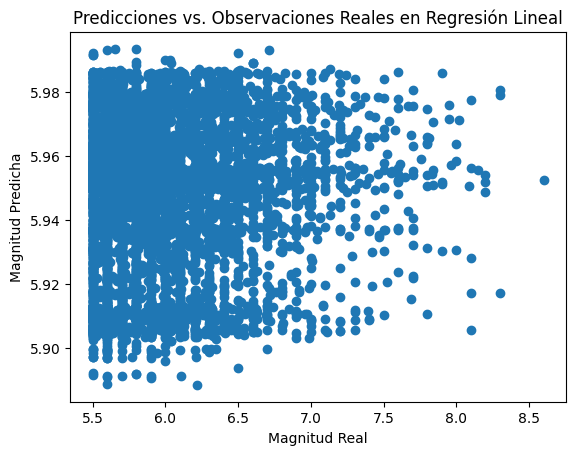

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que 'datos_sismicos_imputados' es tu DataFrame con los datos imputados
# y 'Magnitud' es la variable que deseas predecir.

# División de datos en conjuntos de entrenamiento y prueba
X = datos_sismicos_imputados[['Depth', 'Latitude', 'Longitude']]
y = datos_sismicos_imputados['Mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización y entrenamiento del modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
predicciones = modelo_regresion_lineal.predict(X_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadrático medio (MSE): {mse}")

# Visualización de las predicciones vs. observaciones reales
plt.scatter(y_test, predicciones)
plt.xlabel('Magnitud Real')
plt.ylabel('Magnitud Predicha')
plt.title('Predicciones vs. Observaciones Reales en Regresión Lineal')
plt.show()


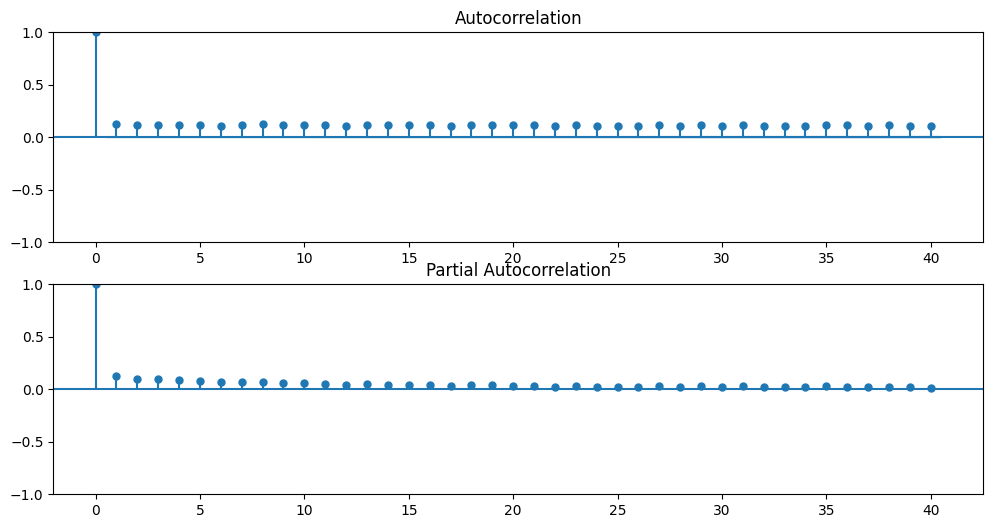

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                    Mag   No. Observations:                37326
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -21349.618
Date:                Sun, 17 Dec 2023   AIC                          42707.236
Time:                        20:28:46   BIC                          42741.346
Sample:                             0   HQIC                         42718.068
                              - 37326                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0177      0.005      3.416      0.001       0.008       0.028
ar.L2          0.0039      0.005      0.760      0.447      -0.006       0.014
ma.L1         -0.9933      0.001  -1724.423      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


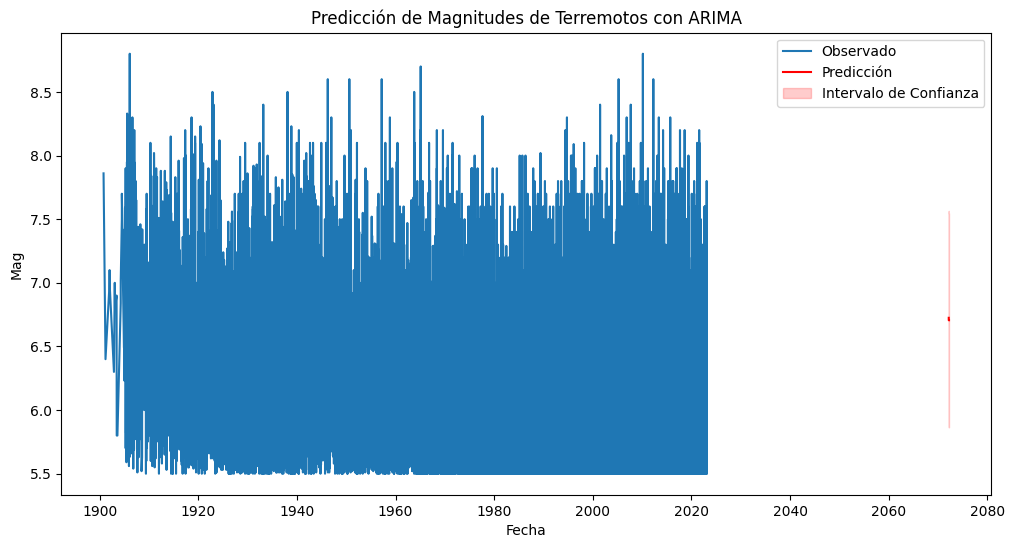

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supongamos que 'datos_sismicos_imputados' es tu DataFrame con los datos imputados
# y 'Magnitud' es la serie temporal que deseas analizar.

# Visualización de la ACF y PACF para determinar los parámetros de ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(datos_sismicos_imputados['Mag'], ax=plt.gca(), lags=40)
plt.subplot(2, 1, 2)
plot_pacf(datos_sismicos_imputados['Mag'], ax=plt.gca(), lags=40)
plt.show()

# Ajuste automático del modelo ARIMA
modelo_arima = ARIMA(datos_sismicos_imputados['Mag'], order=(2, 1, 1))
resultado_arima = modelo_arima.fit()

# Visualización de los resultados
print(resultado_arima.summary())

# Obtención de predicciones
predicciones = resultado_arima.get_forecast(steps=20)
intervalo_confianza = predicciones.conf_int()

# Visualizar la serie temporal y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(datos_sismicos_imputados['Mag'], label='Observado')
plt.plot(predicciones.predicted_mean, color='red', label='Predicción')
plt.fill_between(intervalo_confianza.index,
                 intervalo_confianza.iloc[:, 0],
                 intervalo_confianza.iloc[:, 1], color='red', alpha=0.2, label='Intervalo de Confianza')

plt.title('Predicción de Magnitudes de Terremotos con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Mag')
plt.legend()
plt.show()


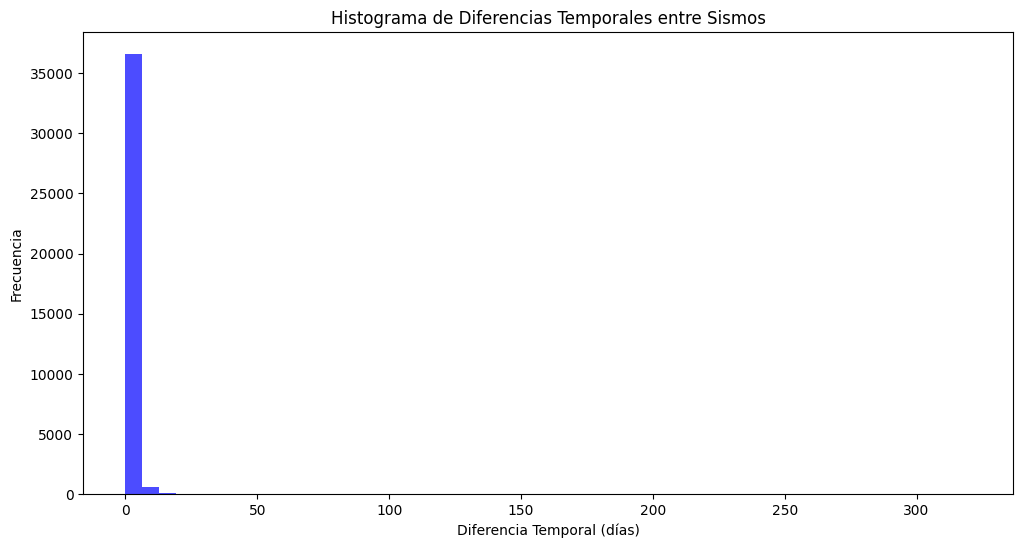

Autocorrelación de las diferencias temporales: 0.25971046126555164


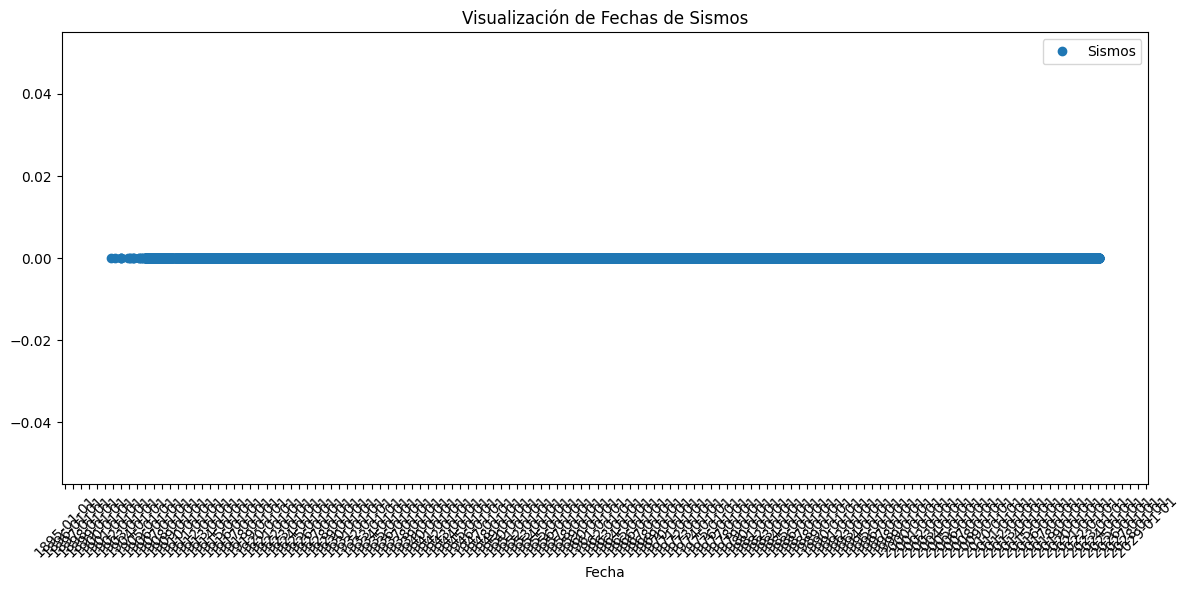

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

# Leer el archivo CSV que ya está en Colab
ruta_archivo = 'Significant Earthquake Dataset 1900-2023.csv'  # Reemplaza con la ruta correcta
datos_sismicos = pd.read_csv(ruta_archivo)

# Convertir la columna de fechas a formato datetime si aún no está en ese formato
datos_sismicos['Time'] = pd.to_datetime(datos_sismicos['Time'])

# Ordenar los datos por fecha
datos_sismicos.sort_values(by='Time', inplace=True)

# Calcular las diferencias entre fechas consecutivas
diferencias_temporales = datos_sismicos['Time'].diff()

# Convertir las diferencias temporales a días (o la unidad que prefieras)
diferencias_temporales_dias = diferencias_temporales / np.timedelta64(1, 'D')

# Histograma de las diferencias temporales convertidas
plt.figure(figsize=(12, 6))
plt.hist(diferencias_temporales_dias.dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Diferencias Temporales entre Sismos')
plt.xlabel('Diferencia Temporal (días)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de autocorrelación
autocorrelacion = diferencias_temporales_dias.autocorr()
print(f"Autocorrelación de las diferencias temporales: {autocorrelacion}")

# Visualización de fechas para detectar patrones visuales
plt.figure(figsize=(12, 6))
plt.plot(datos_sismicos['Time'], np.zeros_like(datos_sismicos['Time']), 'o', label='Sismos')
plt.title('Visualización de Fechas de Sismos')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Establecer el localizador de años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad
plt.legend()
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()


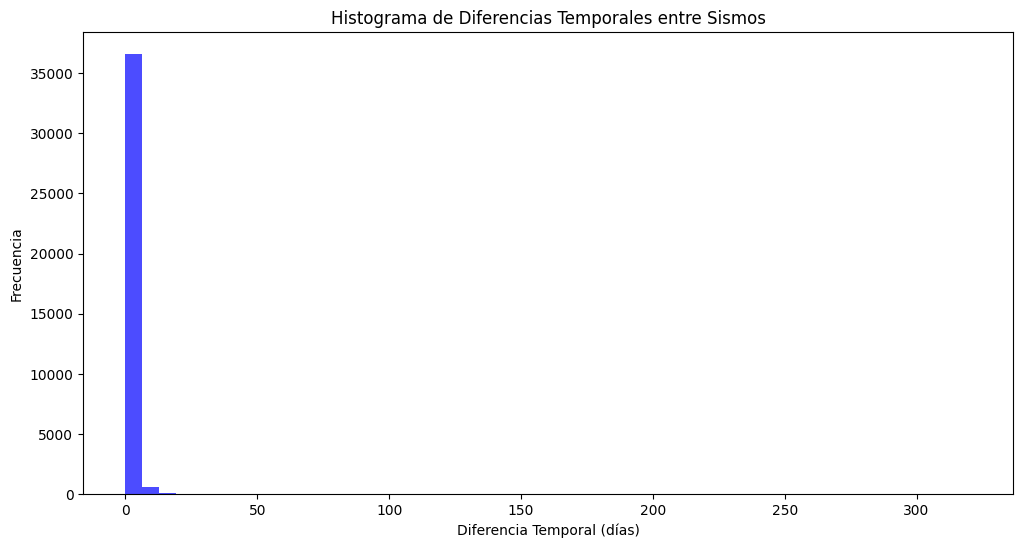

Autocorrelación de las diferencias temporales: 0.25971046126555164


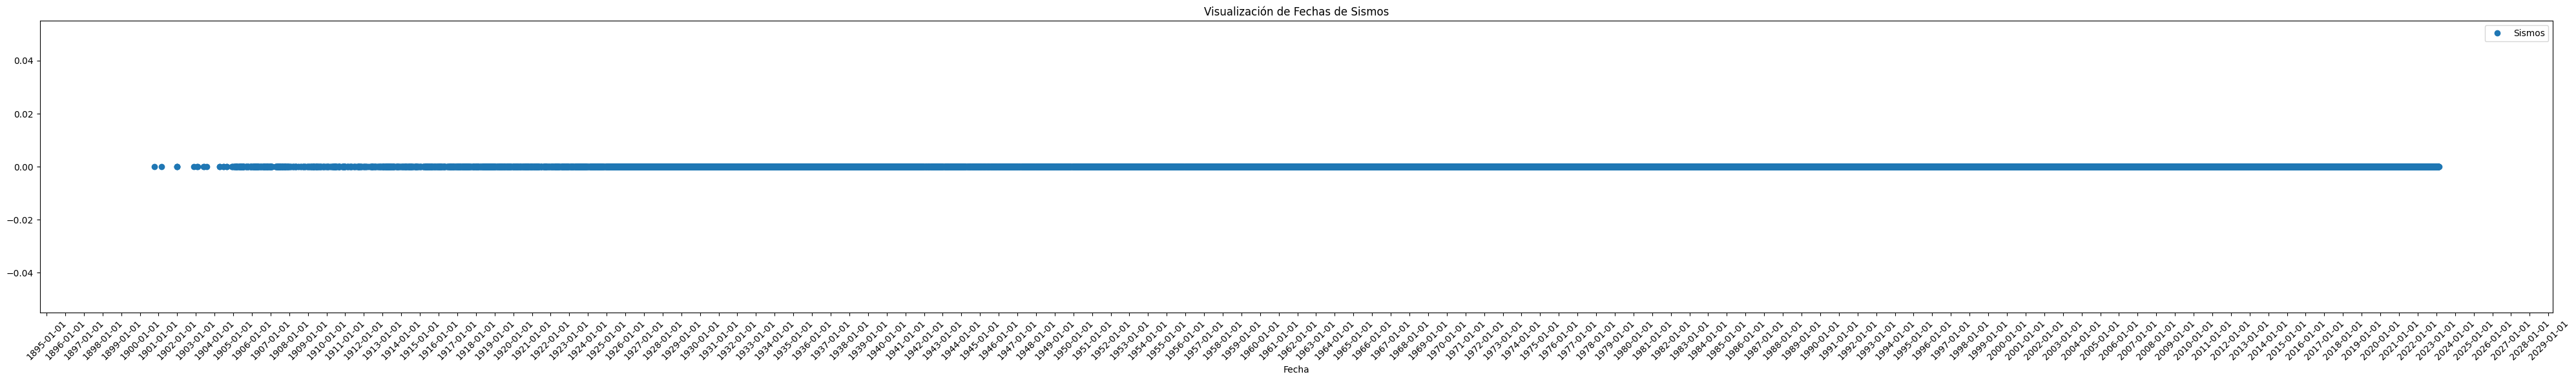

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

# Leer el archivo CSV que ya está en Colab
ruta_archivo = 'Significant Earthquake Dataset 1900-2023.csv'  # Reemplaza con la ruta correcta
datos_sismicos = pd.read_csv(ruta_archivo)

# Convertir la columna de fechas a formato datetime si aún no está en ese formato
datos_sismicos['Time'] = pd.to_datetime(datos_sismicos['Time'])

# Ordenar los datos por fecha
datos_sismicos.sort_values(by='Time', inplace=True)

# Calcular las diferencias entre fechas consecutivas
diferencias_temporales = datos_sismicos['Time'].diff()

# Convertir las diferencias temporales a días (o la unidad que prefieras)
diferencias_temporales_dias = diferencias_temporales / np.timedelta64(1, 'D')

# Histograma de las diferencias temporales convertidas
plt.figure(figsize=(12, 6))
plt.hist(diferencias_temporales_dias.dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Diferencias Temporales entre Sismos')
plt.xlabel('Diferencia Temporal (días)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de autocorrelación
autocorrelacion = diferencias_temporales_dias.autocorr()
print(f"Autocorrelación de las diferencias temporales: {autocorrelacion}")

# Visualización de fechas para detectar patrones visuales
plt.figure(figsize=(40, 6))
plt.plot(datos_sismicos['Time'], np.zeros_like(datos_sismicos['Time']), 'o', label='Sismos')
plt.title('Visualización de Fechas de Sismos')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Establecer el localizador de años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad
plt.legend()
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()
